# Kid Mode: Your First Tiny ML Model 🤖
Run cells from top to bottom (Shift+Enter).

In [4]:
import pandas as pd
df = pd.read_csv('tiny_training_data.csv')
df

,Name,SMILES,MolWt,LogP,TPSA,HBA,HBD,RotatableBonds,RingCount,MolMR,LabuteASA,IsCyclicCarbonate
0,Ethylene Carbonate (EC),O=C1OCCO1,88.062,0.15320,35.53,3,0,0,1,17.300,34.851917,1
1,Propylene Carbonate (PC),CC1COC(=O)O1,102.089,0.54170,35.53,3,0,0,1,21.895,41.216859,1
2,Fluoroethylene Carbonate (FEC),O=C1OCC(F)O1,106.052,0.44880,35.53,3,0,0,1,17.329,39.017452,1
3,Vinylene Carbonate (VC),O=C1OC=CO1,86.046,0.23280,43.35,3,0,0,1,17.244,33.192071,1
4,Dimethyl Carbonate (DMC),COC(=O)OC,90.078,0.39920,35.53,3,0,0,0,19.414,35.857748,0
5,Ethyl Methyl Carbonate (EMC),CCOC(=O)OC,104.105,0.78930,35.53,3,0,1,0,24.031,42.222690,0
6,Diethyl Carbonate (DEC),CCOC(=O)OCC,118.132,1.17940,35.53,3,0,2,0,28.648,48.587632,0
7,"1,3-Dioxolane (DOL)",O1CCOC1,74.079,-0.00930,18.46,2,0,0,1,16.771,30.690395,0
8,"1,2-Dimethoxyethane (DME)",COCCOC,90.122,0.27920,18.46,2,0,3,0,23.752,38.061168,0
9,Acetonitrile (ACN),CC#N,41.053,0.52988,23.79,1,0,0,0,11.287,19.496773,0


In [2]:
df.columns

Index(['Name', 'SMILES', 'MolWt', 'LogP', 'TPSA', 'HBA', 'HBD',
       'RotatableBonds', 'RingCount', 'MolMR', 'LabuteASA',
       'IsCyclicCarbonate'],
      dtype='object')

In [3]:
feature_cols = ["MolWt","LogP","TPSA","HBA","HBD","RotatableBonds","RingCount","MolMR","LabuteASA"]
X = df[feature_cols].values
y = df["IsCyclicCarbonate"].values
print('Rows:', X.shape[0], '| Features:', X.shape[1])

Rows: 11 | Features: 9


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
print('Train:', X_train.shape[0], '| Test:', X_test.shape[0])

Train: 6 | Test: 5


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
model = Pipeline([('scale', StandardScaler()), ('clf', LogisticRegression(max_iter=1000))])
model.fit(X_train, y_train)
print('Learned!')

Learned!


ROC AUC = 1.0


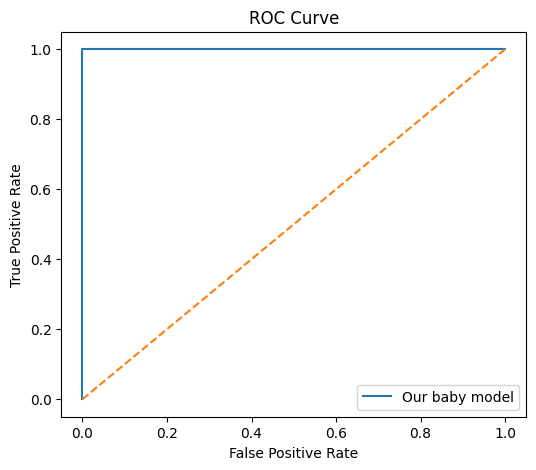

In [7]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, proba)
print('ROC AUC =', round(auc, 3))
fpr, tpr, _ = roc_curve(y_test, proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='Our baby model')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curve'); plt.legend(); plt.show()

In [12]:
pred = (proba >= 0.5).astype(int)
out = df.iloc[:len(pred)][['Name','SMILES']].copy()
out['TrueLabel'] = y_test
out['ProbYES'] = proba
out['Predicted'] = pred
out


,Name,SMILES,TrueLabel,ProbYES,Predicted
0,Ethylene Carbonate (EC),O=C1OCCO1,0,0.032505,0
1,Propylene Carbonate (PC),CC1COC(=O)O1,0,0.589240,1
2,Fluoroethylene Carbonate (FEC),O=C1OCC(F)O1,0,0.080106,0
3,Vinylene Carbonate (VC),O=C1OC=CO1,1,0.803477,1
4,Dimethyl Carbonate (DMC),COC(=O)OC,1,0.775858,1


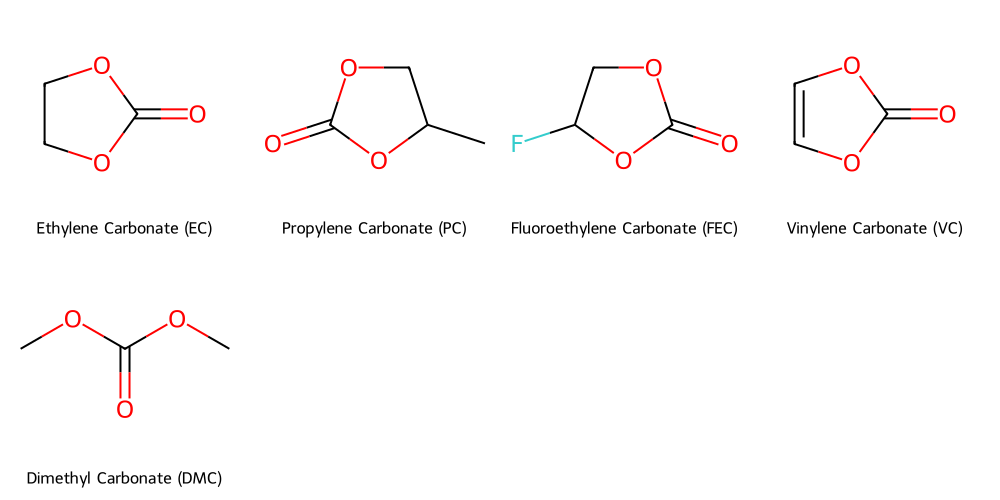

AttributeError: 'Image' object has no attribute 'save'

In [ ]:
from pathlib import Path
import pandas as pd

# RDKit imports

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import MolsToGridImage

# 1) Build molecule objects from SMILES
df_plot = out.copy()  # assumes your DataFrame is named `out` with columns: Name, SMILES
df_plot['Mol'] = df_plot['SMILES'].apply(lambda s: Chem.MolFromSmiles(str(s)) if pd.notna(s) else None)
df_plot = df_plot[df_plot['Mol'].notna()]  # drop any invalid SMILES

# 2) Show a grid image in the notebook (change molsPerRow/subImgSize as you like)
mols = df_plot['Mol'].tolist()
legends = df_plot['Name'].astype(str).tolist()
img = MolsToGridImage(mols, molsPerRow=4, subImgSize=(250, 250), legends=legends)
display(img)

# 3) Optionally save the grid image
img.save("molecules_grid.png")

# 4) Optionally export one PNG per molecule
def sanitize_filename(name: str) -> str:
    bad = '<>:"/\\|?*'
    for ch in bad:
        name = name.replace(ch, "_")
    return name[:120]  # keep filenames manageable

out_dir = Path("molecule_pngs")
out_dir.mkdir(exist_ok=True)
for name, mol in zip(df_plot['Name'].astype(str), df_plot['Mol']):
    Draw.MolToFile(mol, out_dir / f"{sanitize_filename(name)}.png", size=(300, 300))


/var/folders/4y/35153s695c7cs0lc76d9dhdm0000gn/T/ipykernel_79538/181658644.py:130: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  probs.append(float(torch.sigmoid(logit).detach().cpu().numpy()))


Test accuracy: 1.0
Test AUC: 1.0


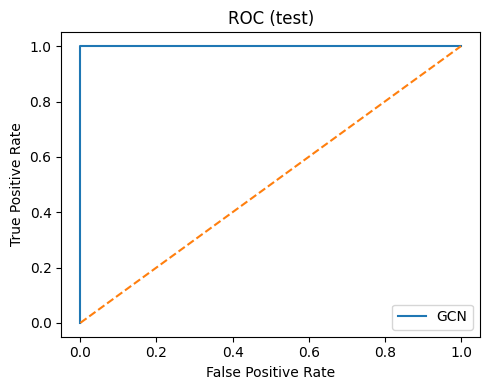

,name,true,prob_yes,pred
0,"1,2-Dimethoxyethane (DME)",0,0.000870,0
1,Vinylene Carbonate (VC),1,0.999293,1
2,Ethylene Carbonate (EC),1,0.985643,1
3,Ethyl Methyl Carbonate (EMC),0,0.009221,0


In [14]:
# --- If you need packages, remove the leading # and run once ---
# !pip install rdkit-pypi torch scikit-learn pandas matplotlib

import numpy as np, pandas as pd, matplotlib.pyplot as plt
import torch, torch.nn as nn, torch.nn.functional as F
from sklearn.metrics import roc_auc_score, roc_curve

from rdkit import Chem
from rdkit.Chem import rdchem

# -----------------------------
# 1) Tiny demo data (11 molecules)
# label = 1 if cyclic carbonate, else 0
# -----------------------------
rows = [
    ("Ethylene Carbonate (EC)", "O=C1OCCO1", 1),
    ("Propylene Carbonate (PC)", "CC1COC(=O)O1", 1),
    ("Fluoroethylene Carbonate (FEC)", "O=C1OCC(F)O1", 1),
    ("Vinylene Carbonate (VC)", "O=C1OC=CO1", 1),
    ("Dimethyl Carbonate (DMC)", "COC(=O)OC", 0),
    ("Ethyl Methyl Carbonate (EMC)", "CCOC(=O)OC", 0),
    ("Diethyl Carbonate (DEC)", "CCOC(=O)OCC", 0),
    ("1,3-Dioxolane (DOL)", "O1CCOC1", 0),
    ("1,2-Dimethoxyethane (DME)", "COCCOC", 0),
    ("Acetonitrile (ACN)", "CC#N", 0),
    ("Ethyl Acetate (EA)", "CCOC(=O)C", 0),
]
df = pd.DataFrame(rows, columns=["name","smiles","label"])

# -----------------------------
# 2) Turn SMILES → graph (atoms = nodes, bonds = edges)
#    Each atom gets a small feature vector.
# -----------------------------
ATOM_LIST = ["C","O","F","N","S","P","H","Li","Si"]
HYB_LIST  = [rdchem.HybridizationType.SP, rdchem.HybridizationType.SP2, rdchem.HybridizationType.SP3]

def one_hot(x, choices):
    v = [0]*len(choices)
    if x in choices: v[choices.index(x)] = 1
    return v

def atom_features(atom):
    return np.array(
        one_hot(atom.GetSymbol(), ATOM_LIST) +                 # element
        [int(atom.GetIsAromatic())] +                          # aromatic?
        one_hot(atom.GetHybridization(), HYB_LIST) +           # sp/sp2/sp3
        [atom.GetDegree()/4.0,                                 # neighbors (scaled)
         atom.GetFormalCharge(),                               # charge
         int(atom.IsInRing())],                                # in ring?
        dtype=np.float32
    )

def smiles_to_graph(smiles):
    m = Chem.MolFromSmiles(smiles)
    if m is None: raise ValueError(f"Bad SMILES: {smiles}")
    m = Chem.AddHs(m)                                         # explicit H for stability
    N = m.GetNumAtoms()
    X = np.vstack([atom_features(m.GetAtomWithIdx(i)) for i in range(N)])   # [N,F]
    A = np.zeros((N,N), dtype=np.float32)
    for b in m.GetBonds():
        i, j = b.GetBeginAtomIdx(), b.GetEndAtomIdx()
        A[i,j] = 1.0; A[j,i] = 1.0
    A += np.eye(N, dtype=np.float32)                          # self-loops
    return torch.tensor(X), torch.tensor(A)

graphs = []
for _, r in df.iterrows():
    X, A = smiles_to_graph(r["smiles"])
    graphs.append({"name": r["name"], "X": X, "A": A, "y": int(r["label"])})

# -----------------------------
# 3) A tiny Graph Convolution (GCN) model
#    Math idea: each atom mixes info with its neighbors a few times,
#    then we average atoms to get one vector per molecule.
# -----------------------------
def normalize_adjacency(A):
    deg = A.sum(dim=1)                               # [N]
    D_inv_sqrt = torch.diag((deg + 1e-8).pow(-0.5))  # [N,N]
    return D_inv_sqrt @ A @ D_inv_sqrt               # D^-1/2 A D^-1/2

class GCNLayer(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.lin = nn.Linear(in_dim, out_dim)
    def forward(self, X, A_norm):
        return F.relu(A_norm @ self.lin(X))          # [N,F] -> [N,out]

class GCN(nn.Module):
    def __init__(self, in_dim, hid=64, drop=0.1):
        super().__init__()
        self.g1 = GCNLayer(in_dim, hid)
        self.g2 = GCNLayer(hid, hid)
        self.head = nn.Sequential(
            nn.Linear(hid, hid), nn.ReLU(), nn.Dropout(drop),
            nn.Linear(hid, 1)                        # 1 logit → sigmoid → probability
        )
    def forward(self, X, A):
        A_norm = normalize_adjacency(A)
        h = self.g1(X, A_norm)
        h = self.g2(h, A_norm)
        m = h.mean(dim=0, keepdim=True)              # mean-pool atoms → [1,hid]
        return self.head(m).squeeze(1)               # [1]

# -----------------------------
# 4) Train/test split and training loop (fast)
# -----------------------------
idx = np.arange(len(graphs))
np.random.seed(0); np.random.shuffle(idx)
split = int(0.7*len(idx))
train_idx, test_idx = idx[:split], idx[split:]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model  = GCN(graphs[0]["X"].shape[1], hid=64).to(device)
opt    = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
lossfn = nn.BCEWithLogitsLoss()

def run_batch(idxs, train=False):
    if train: model.train()
    else:      model.eval()
    losses, probs, ys, names = [], [], [], []
    for i in idxs:
        g = graphs[i]
        X, A = g["X"].to(device), g["A"].to(device)
        y     = torch.tensor([g["y"]], dtype=torch.float32, device=device)
        logit = model(X, A)                          # [1]
        loss  = lossfn(logit, y)
        if train:
            opt.zero_grad(); loss.backward(); opt.step()
        losses.append(float(loss.item()))
        probs.append(float(torch.sigmoid(logit).detach().cpu().numpy()))
        ys.append(g["y"]); names.append(g["name"])
    return np.mean(losses), np.array(probs), np.array(ys), names

# quick train (small data → few epochs is fine)
for epoch in range(50):
    tr_loss, _, _, _ = run_batch(train_idx, train=True)

# -----------------------------
# 5) Evaluate
# -----------------------------
te_loss, te_p, te_y, te_names = run_batch(test_idx, train=False)
pred   = (te_p >= 0.5).astype(int)
acc    = (pred == te_y).mean()
print("Test accuracy:", round(float(acc), 3))
if len(set(te_y)) == 2:
    fpr, tpr, _ = roc_curve(te_y, te_p)
    try: auc = roc_auc_score(te_y, te_p)
    except: auc = float("nan")
    print("Test AUC:", round(float(auc),3))
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label="GCN"); plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate"); plt.title("ROC (test)")
    plt.legend(); plt.tight_layout(); plt.show()

pd.DataFrame({"name": te_names, "true": te_y, "prob_yes": te_p, "pred": pred})


Epoch 020 | train 0.385 | test 0.363
Epoch 040 | train 0.029 | test 0.007
Epoch 060 | train 0.001 | test 0.000
Test accuracy: 1.0
Test AUC: 1.0


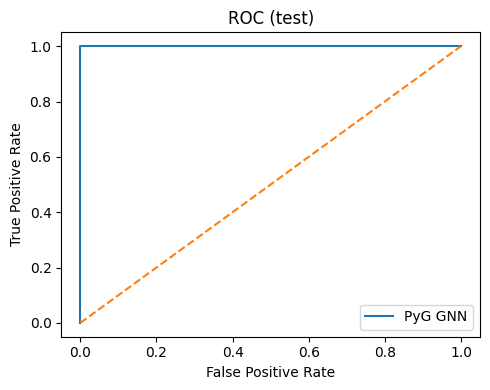

                        name  true  prob_yes  pred
     Vinylene Carbonate (VC)   1.0  0.999983     1
     Ethylene Carbonate (EC)   1.0  0.999286     1
Ethyl Methyl Carbonate (EMC)   0.0  0.000439     0
   1,2-Dimethoxyethane (DME)   0.0  0.000003     0


In [15]:
# --- Tiny molecular GNN with PyTorch Geometric ---
# Task: classify "is cyclic carbonate?" for a toy set of solvents.

import numpy as np, pandas as pd, matplotlib.pyplot as plt, torch, torch.nn as nn, torch.nn.functional as F
from sklearn.metrics import roc_auc_score, roc_curve
from rdkit import Chem
from rdkit.Chem import rdchem

# PyG imports
from torch_geometric.data import Data, InMemoryDataset
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, GINConv, global_mean_pool

# -----------------------------
# 1) Toy dataset (11 molecules)
# -----------------------------
rows = [
    ("Ethylene Carbonate (EC)", "O=C1OCCO1", 1),
    ("Propylene Carbonate (PC)", "CC1COC(=O)O1", 1),
    ("Fluoroethylene Carbonate (FEC)", "O=C1OCC(F)O1", 1),
    ("Vinylene Carbonate (VC)", "O=C1OC=CO1", 1),
    ("Dimethyl Carbonate (DMC)", "COC(=O)OC", 0),
    ("Ethyl Methyl Carbonate (EMC)", "CCOC(=O)OC", 0),
    ("Diethyl Carbonate (DEC)", "CCOC(=O)OCC", 0),
    ("1,3-Dioxolane (DOL)", "O1CCOC1", 0),
    ("1,2-Dimethoxyethane (DME)", "COCCOC", 0),
    ("Acetonitrile (ACN)", "CC#N", 0),
    ("Ethyl Acetate (EA)", "CCOC(=O)C", 0),
]
df = pd.DataFrame(rows, columns=["name","smiles","label"])

# -----------------------------
# 2) Featurization (RDKit → PyG Data)
#    - Node features x: element, aromatic, hybridization, degree, charge, in_ring
#    - Edges: undirected bonds as edge_index (2, E). (We’ll ignore edge_attr here to keep it simple.)
# -----------------------------
ATOM_LIST = ["C","O","F","N","S","P","H","Li","Si"]
HYB_LIST  = [rdchem.HybridizationType.SP, rdchem.HybridizationType.SP2, rdchem.HybridizationType.SP3]

def one_hot(x, choices):
    v = [0]*len(choices)
    if x in choices: v[choices.index(x)] = 1
    return v

def atom_features(atom):
    return np.array(
        one_hot(atom.GetSymbol(), ATOM_LIST) +                  # element
        [int(atom.GetIsAromatic())] +                           # aromatic?
        one_hot(atom.GetHybridization(), HYB_LIST) +            # sp/sp2/sp3
        [atom.GetDegree()/4.0,                                  # degree (scaled)
         atom.GetFormalCharge(),                                # charge
         int(atom.IsInRing())],                                 # in ring?
        dtype=np.float32
    )

def smiles_to_pyg(smiles, y, name):
    m = Chem.MolFromSmiles(smiles)
    if m is None:
        raise ValueError(f"Bad SMILES: {smiles}")
    m = Chem.AddHs(m)  # explicit H for stability

    # node features
    x = np.vstack([atom_features(m.GetAtomWithIdx(i)) for i in range(m.GetNumAtoms())])
    x = torch.tensor(x, dtype=torch.float32)

    # edges (undirected → add both directions)
    rows, cols = [], []
    for b in m.GetBonds():
        i, j = b.GetBeginAtomIdx(), b.GetEndAtomIdx()
        rows += [i, j]; cols += [j, i]
    if len(rows) == 0:
        # handle single-atom molecules gracefully
        edge_index = torch.zeros((2,0), dtype=torch.long)
    else:
        edge_index = torch.tensor([rows, cols], dtype=torch.long)

    y = torch.tensor([y], dtype=torch.float32)  # binary label
    data = Data(x=x, edge_index=edge_index, y=y)
    data.name = name
    return data

graphs = [smiles_to_pyg(r.smiles, r.label, r.name) for r in df.itertuples()]

# -----------------------------
# 3) Dataset + split + loaders
# -----------------------------
idx = np.arange(len(graphs))
np.random.seed(0); np.random.shuffle(idx)
split = int(0.7*len(idx))
train_idx, test_idx = idx[:split], idx[split:]

train_list = [graphs[i] for i in train_idx]
test_list  = [graphs[i] for i in test_idx]

train_loader = DataLoader(train_list, batch_size=4, shuffle=True)
test_loader  = DataLoader(test_list, batch_size=4, shuffle=False)

# (For real projects use a scaffold split by Bemis–Murcko; this is a tiny demo.)

# -----------------------------
# 4) Model (GCN or GIN)
# -----------------------------
class GCNModel(nn.Module):
    def __init__(self, in_dim, hidden=64, dropout=0.1):
        super().__init__()
        self.conv1 = GCNConv(in_dim, hidden)
        self.conv2 = GCNConv(hidden, hidden)
        self.head  = nn.Sequential(
            nn.Linear(hidden, hidden), nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(hidden, 1)  # logits
        )
    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        m = global_mean_pool(x, batch)      # [batch, hidden]
        return self.head(m).squeeze(1)      # [batch]

# Alternative: GIN (often strong on molecules)
class GINModel(nn.Module):
    def __init__(self, in_dim, hidden=64, dropout=0.1):
        super().__init__()
        def mlp(a,b): return nn.Sequential(nn.Linear(a,b), nn.ReLU(), nn.Linear(b,b))
        self.g1 = GINConv(mlp(in_dim, hidden))
        self.g2 = GINConv(mlp(hidden, hidden))
        self.head = nn.Sequential(
            nn.Linear(hidden, hidden), nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(hidden, 1)
        )
    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.g1(x, edge_index))
        x = F.relu(self.g2(x, edge_index))
        m = global_mean_pool(x, batch)
        return self.head(m).squeeze(1)

in_dim = graphs[0].x.shape[1]
model  = GINModel(in_dim, hidden=64, dropout=0.1)  # or GCNModel
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model  = model.to(device)

opt    = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
lossfn = nn.BCEWithLogitsLoss()

# -----------------------------
# 5) Train / evaluate
# -----------------------------
def run_epoch(loader, train=False):
    if train: model.train()
    else:     model.eval()
    losses, probs, ys, names = [], [], [], []
    for batch in loader:
        batch = batch.to(device)
        logits = model(batch)                  # [B]
        loss   = lossfn(logits, batch.y.view(-1))
        if train:
            opt.zero_grad(); loss.backward(); opt.step()
        losses.append(loss.item())

        with torch.no_grad():
            p = torch.sigmoid(logits).cpu().numpy()
            y = batch.y.view(-1).cpu().numpy()
            probs.append(p); ys.append(y)
            # batch has multiple graphs; keep names
            if hasattr(batch, 'name'):
                names += list(batch.name) if isinstance(batch.name, list) else [batch.name]*len(p)
            else:
                names += [""]*len(p)
    probs = np.concatenate(probs) if probs else np.array([])
    ys    = np.concatenate(ys) if ys else np.array([])
    return float(np.mean(losses)) if losses else np.nan, probs, ys, names

for epoch in range(60):
    tr_loss, _, _, _ = run_epoch(train_loader, train=True)
    if (epoch+1) % 20 == 0:
        te_loss, te_p, te_y, _ = run_epoch(test_loader, train=False)
        print(f"Epoch {epoch+1:03d} | train {tr_loss:.3f} | test {te_loss:.3f}")

# Final evaluation
te_loss, te_p, te_y, te_names = run_epoch(test_loader, train=False)
pred = (te_p >= 0.5).astype(int)
acc  = (pred == te_y).mean() if len(te_y) else float('nan')
print("Test accuracy:", round(float(acc), 3))

if len(set(te_y)) == 2:
    fpr, tpr, _ = roc_curve(te_y, te_p)
    auc = roc_auc_score(te_y, te_p)
    print("Test AUC:", round(float(auc), 3))
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label="PyG GNN")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.title("ROC (test)"); plt.legend(); plt.tight_layout(); plt.show()

out = pd.DataFrame({"name": te_names, "true": te_y, "prob_yes": te_p, "pred": pred})
print(out.sort_values("prob_yes", ascending=False).to_string(index=False))


/opt/miniconda3/envs/rohit/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/miniconda3/envs/rohit/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:450: ConvergenceWarning: The optimal value found for dimension 1 of parameter k1__k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/miniconda3/envs/rohit/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:440: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/miniconda3/envs/rohit/lib/python3.12/

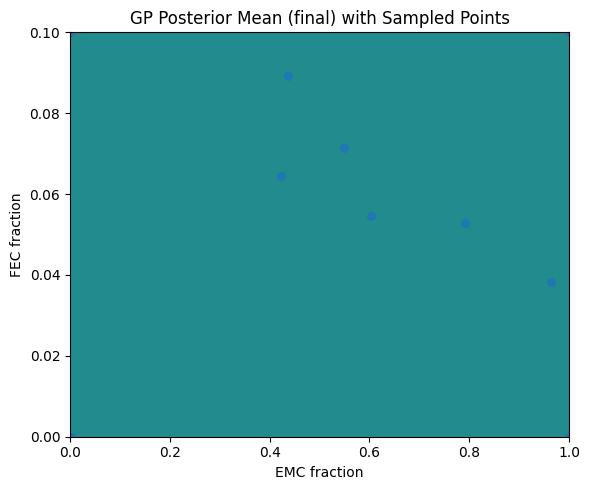

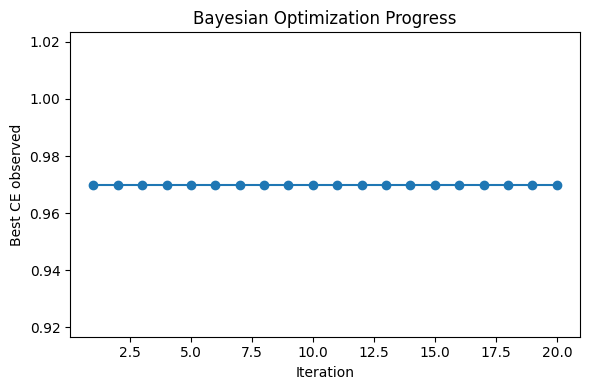

,iter,emc,fec,ce,best_so_far
0,1,0.0,0.0,0.97,0.97
1,2,0.0,0.0,0.97,0.97
18,19,0.0,0.0,0.97,0.97
17,18,0.0,0.0,0.97,0.97
16,17,0.0,0.0,0.97,0.97
15,16,0.0,0.0,0.97,0.97
14,15,0.0,0.0,0.97,0.97
13,14,0.0,0.0,0.97,0.97
12,13,0.0,0.0,0.97,0.97
11,12,0.0,0.0,0.97,0.97


In [16]:
# Bayesian Optimization demo (from scratch with scikit-learn GP + EI acquisition)
# Problem (toy): choose EMC ratio (0..1) and FEC fraction (0..0.10) to maximize a fake "CE" score.
# You can later replace the 'true_experiment' with your real measurement function.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel as C

# --- 1) Define the (fake) experiment we want to optimize ------------------------------------
# Think of this as Li|Cu Coulombic Efficiency after 100 cycles, in fraction (0..1).
# Peak near EMC=0.7 and FEC=0.05, with some noise to mimic experiment-to-experiment variation.
rng = np.random.default_rng(42)
def true_experiment(x_emc, x_fec):
    peak = 0.997 - ((x_emc - 0.70)**2)/0.02 - ((x_fec - 0.05)**2)/0.0007
    noise = rng.normal(0, 0.0005)  # ±0.05% noise
    return float(np.clip(peak + noise, 0.970, 0.999))

# Search space: EMC in [0,1], FEC in [0,0.10]
bounds = np.array([[0.0, 1.0], [0.0, 0.10]])

# --- 2) Utilities: Expected Improvement (EI) on a grid ---------------------------------------
def expected_improvement(X_cand, gp, y_best, xi=0.0005):
    mu, sigma = gp.predict(X_cand, return_std=True)
    sigma = sigma.reshape(-1, 1); mu = mu.reshape(-1, 1)
    with np.errstate(divide='warn'):
        from math import erf
        Z = (mu - y_best - xi) / sigma
        def cdf(z): return 0.5*(1.0 + erf(z/np.sqrt(2)))
        def pdf(z): return (1/np.sqrt(2*np.pi))*np.exp(-0.5*z*z)
        ei = (mu - y_best - xi) * np.vectorize(cdf)(Z) + sigma * np.vectorize(pdf)(Z)
        ei[sigma == 0.0] = 0.0
    return ei.ravel()

# Grid of candidates (80x80)
g1 = np.linspace(bounds[0,0], bounds[0,1], 80)
g2 = np.linspace(bounds[1,0], bounds[1,1], 80)
G1, G2 = np.meshgrid(g1, g2)
grid = np.column_stack([G1.ravel(), G2.ravel()])

# --- 3) Initialize with a few random points --------------------------------------------------
n_init = 6
X = np.random.RandomState(0).rand(n_init, 2)
X[:, 0] = bounds[0,0] + (bounds[0,1]-bounds[0,0]) * X[:, 0]  # EMC
X[:, 1] = bounds[1,0] + (bounds[1,1]-bounds[1,0]) * X[:, 1]  # FEC
y = np.array([true_experiment(x[0], x[1]) for x in X])

# GP model (Matern 3/2 + noise)
kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=[0.2, 0.02],
                                      length_scale_bounds=(1e-2, 1e2), nu=1.5) \
         + WhiteKernel(noise_level=1e-6, noise_level_bounds=(1e-9, 1e-3))
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.0, normalize_y=True,
                              n_restarts_optimizer=3, random_state=0)

# --- 4) BO loop ------------------------------------------------------------------------------
history = []
for t in range(20):
    gp.fit(X, y)
    y_best = np.max(y)
    ei = expected_improvement(grid, gp, y_best, xi=0.0005)
    x_next = grid[int(np.argmax(ei))]
    y_next = true_experiment(x_next[0], x_next[1])

    X = np.vstack([X, x_next])
    y = np.append(y, y_next)
    history.append({"iter": t+1, "emc": x_next[0], "fec": x_next[1],
                    "ce": y_next, "best_so_far": np.max(y)})

hist_df = pd.DataFrame(history)
hist_df.to_csv("bo_suggested_experiments.csv", index=False)

# --- 5) Plots --------------------------------------------------------------------------------
# (A) Posterior mean heatmap with sampled points
gp.fit(X, y)
MU = gp.predict(grid).reshape(G1.shape)

plt.figure(figsize=(6,5))
plt.contourf(G1, G2, MU, levels=25)
plt.scatter(X[:,0], X[:,1], s=30)
plt.xlabel("EMC fraction"); plt.ylabel("FEC fraction")
plt.title("GP Posterior Mean (final) with Sampled Points")
plt.tight_layout(); plt.show()

# (B) Best observed vs iteration
plt.figure(figsize=(6,4))
plt.plot(hist_df["iter"], hist_df["best_so_far"], marker="o")
plt.xlabel("Iteration"); plt.ylabel("Best CE observed")
plt.title("Bayesian Optimization Progress")
plt.tight_layout(); plt.show()

# Top-10 points (observed)
hist_df.sort_values("ce", ascending=False).head(10)


In [18]:
# Natural language processing 
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
solvents = {
    "Ethylene Carbonate (EC)": "O=C1OCCO1",
    "Dimethyl Carbonate (DMC)": "CCOC(=O)OC",
    #"Propylene Carbonate (PC)": "C1COC(=O)O1C"
}
for name, smi in solvents.items():
    mol = Chem.MolFromSmiles(smi)
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    print(f"{name}: MW={mw:.2f}, logP={logp:.2f}")



Ethylene Carbonate (EC): MW=88.06, logP=0.15
Dimethyl Carbonate (DMC): MW=104.10, logP=0.79


In [19]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

# Define some electrolyte solvents as SMILES
solvents = {
    "Ethylene Carbonate (EC)": "O=C1OCCO1",
    "Dimethyl Carbonate (DMC)": "CCOC(=O)OC",
    #"Propylene Carbonate (PC)": "C1COC(=O)O1C"
}

# Generate Morgan (circular) fingerprints
for name, smi in solvents.items():
    mol = Chem.MolFromSmiles(smi)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=1024)  # radius=2 is common
    arr = np.array(fp)  # convert to numpy array
    
    print(f"{name}")
    print(f"SMILES: {smi}")
    print(arr)
    print("-" * 40)

Ethylene Carbonate (EC)
SMILES: O=C1OCCO1
[0 0 0 ... 0 0 0]
----------------------------------------
Dimethyl Carbonate (DMC)
SMILES: CCOC(=O)OC
[0 1 0 ... 0 0 0]
----------------------------------------


[21:35:07] DEPRECATION WARNING: please use MorganGenerator
[21:35:07] DEPRECATION WARNING: please use MorganGenerator
